# Clustering algorithms like *K-means, DBSCAN* and *Hierarchical clustering* can cluster groups of people based on shared characteristics.




In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [54]:
# Load Data
data=pd.read_csv("/content/Mall_Customers.csv")
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#Explore data


In [55]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


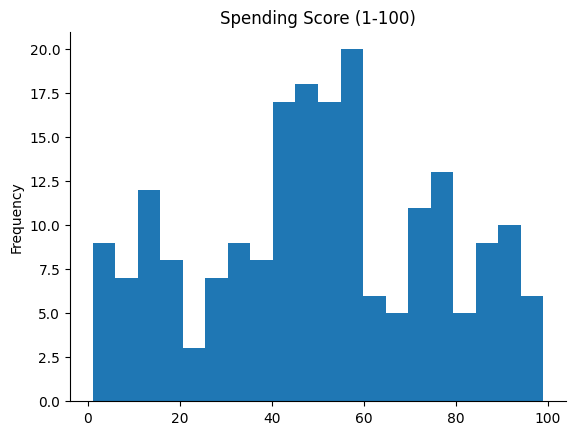

In [56]:
# @title Spending Score (1-100)

from matplotlib import pyplot as plt
data['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

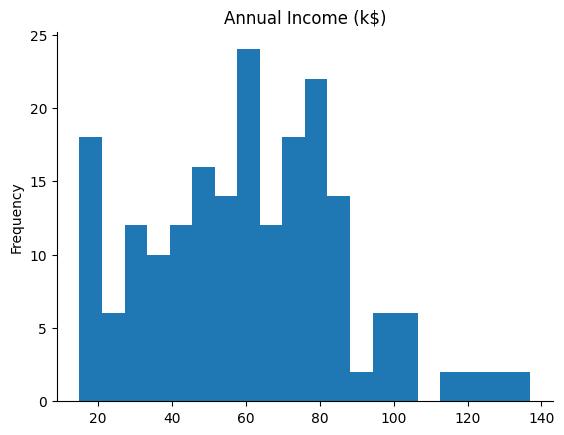

In [57]:
# @title Annual Income (k$)

from matplotlib import pyplot as plt
data['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Cluster people based on Annual Income and Spending score

#K-means Clustering





In [58]:
# Extract features to cluster
X= data[['Annual Income (k$)','Spending Score (1-100)']].values
print(X[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [59]:
X = StandardScaler().fit_transform(X)


#Find the optimal number of clusters: WCSS (Compactness) for different cluster values.








In [60]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

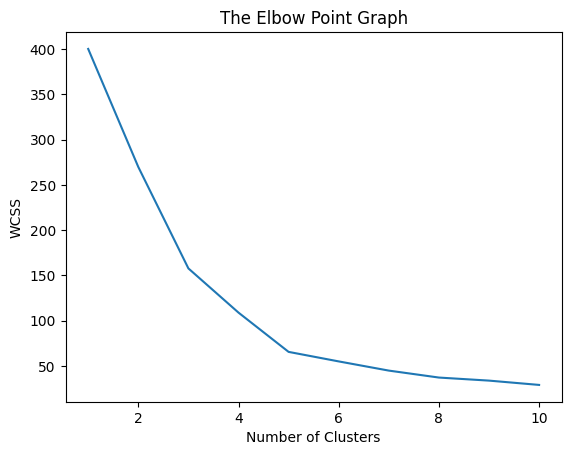

In [61]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


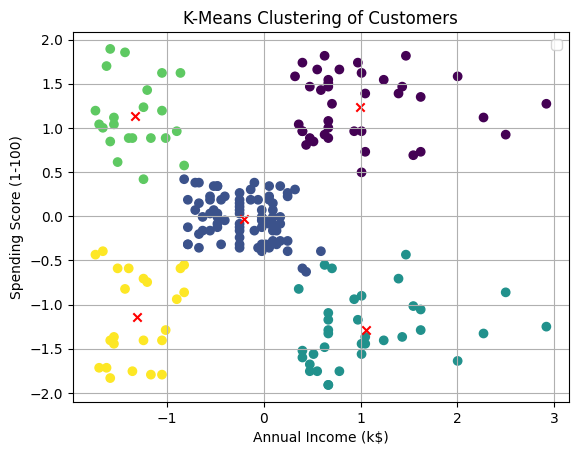

In [62]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=10)
y=kmeans.fit_predict(X)

#plot
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='x')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.grid(True)
plt.show()

# Hierachichal clustering

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

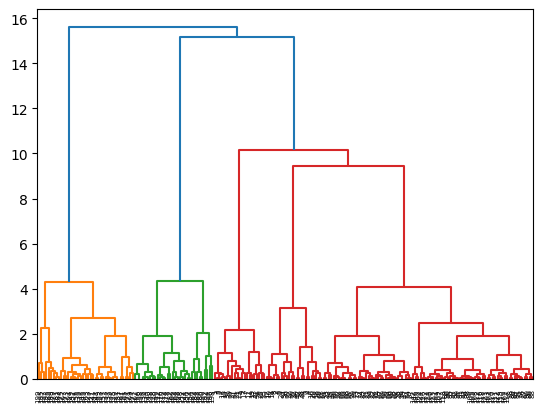

In [64]:
linkage_matrix = linkage(X, method='ward')

# Create the dendrogram
dend = dendrogram(linkage_matrix)

# Show the dendrogram
plt.show()

In [65]:
hc_average = linkage(X, "average")
hc_ward = linkage(X, "ward")
hc_complete = linkage(X, "complete")
hc_single = linkage(X, "single")
hc_centroid = linkage(X, "centroid")

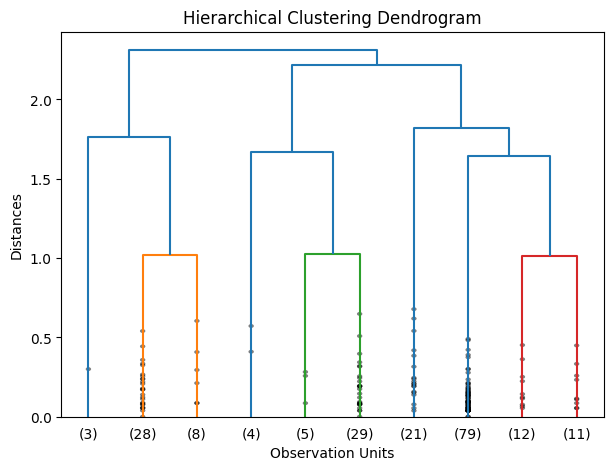

In [66]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-67-1af82392b9ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cluster_counts, palette='viridis')


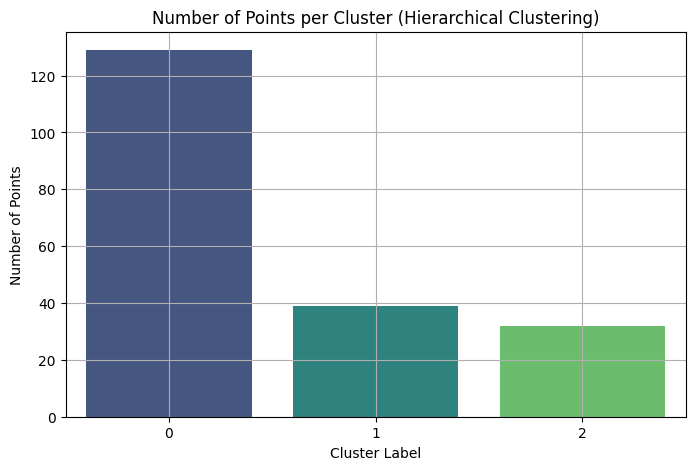

In [67]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X)
clusters_hc

# Count the number of points in each cluster
unique, counts = np.unique(clusters_hc, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Plot
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(cluster_counts, palette='viridis')

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Number of Points per Cluster (Hierarchical Clustering)')
plt.grid('True')

# Show plot
plt.show()



DBSCAN

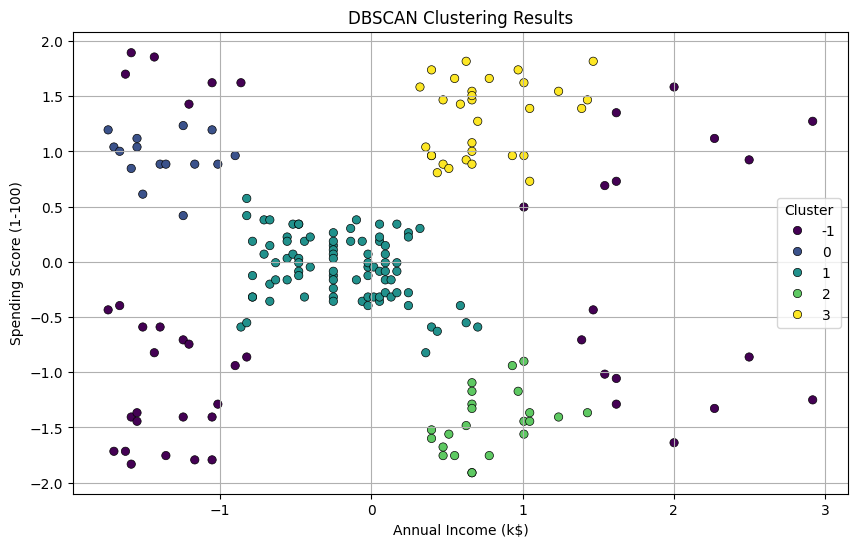

In [71]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=15)
clusters = dbscan.fit_predict(X)

cluster_df = pd.DataFrame({
    'Annual Income (k$)': X[:, 0],
    'Spending Score (1-100)': X[:, 1],
    'Cluster': clusters
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=cluster_df,
    marker='o',
    edgecolor='k'
)
# Add plot title and labels
plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Cluster')

# Show plot
plt.show()